In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from joblib import dump
import matplotlib.pyplot as plt
import os
import random

In [11]:
data_dir = 'na'

image_size = (224, 224)
batch_size = 32

train_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=image_size,
    validation_split=0.2,
    subset='training',
    seed=1337
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=image_size,
    validation_split=0.2,
    subset='validation',
    seed=1337
)


test_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=image_size,
    shuffle=False
)

Found 6899 files belonging to 8 classes.
Using 5520 files for training.
Found 6899 files belonging to 8 classes.
Using 1379 files for validation.


ValueError: If `subset` is set, `validation_split` must be set, and inversely.

In [5]:
inputs = keras.Input(shape=(224, 224, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(16, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(8, activation='softmax')(x)
model = keras.Model(inputs, outputs)

model.compile(optimizer='adam', loss='categorical_crossentropy', 
             metrics=['accuracy'])

callbacks = [
    keras.callbacks.ModelCheckpoint('natural_images.h5',
                                  save_best_only=True)
]
history = model.fit(train_dataset,
                   epochs=10,
                   validation_data=validation_dataset,
                   callbacks=callbacks)

Epoch 1/10
173/173 [==============================] - 117s 664ms/step - loss: 0.6987 - accuracy: 0.7478 - val_loss: 0.4285 - val_accuracy: 0.8513
Epoch 2/10
173/173 [==============================] - 112s 643ms/step - loss: 0.2649 - accuracy: 0.9002 - val_loss: 0.2697 - val_accuracy: 0.8963
Epoch 3/10
173/173 [==============================] - 146s 845ms/step - loss: 0.1729 - accuracy: 0.9362 - val_loss: 0.3224 - val_accuracy: 0.8782
Epoch 4/10
173/173 [==============================] - 144s 831ms/step - loss: 0.1142 - accuracy: 0.9589 - val_loss: 0.2965 - val_accuracy: 0.8941
Epoch 5/10
173/173 [==============================] - 145s 836ms/step - loss: 0.0666 - accuracy: 0.9788 - val_loss: 0.3191 - val_accuracy: 0.9130
Epoch 6/10
173/173 [==============================] - 145s 839ms/step - loss: 0.0600 - accuracy: 0.9792 - val_loss: 0.3715 - val_accuracy: 0.8941
Epoch 7/10
173/173 [==============================] - 148s 856ms/step - loss: 0.0478 - accuracy: 0.9877 - val_loss: 0.4302 -

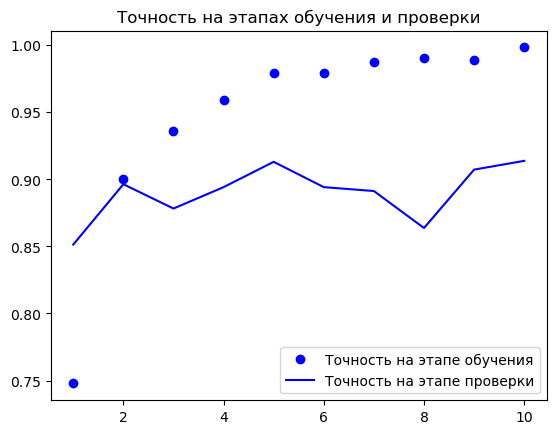

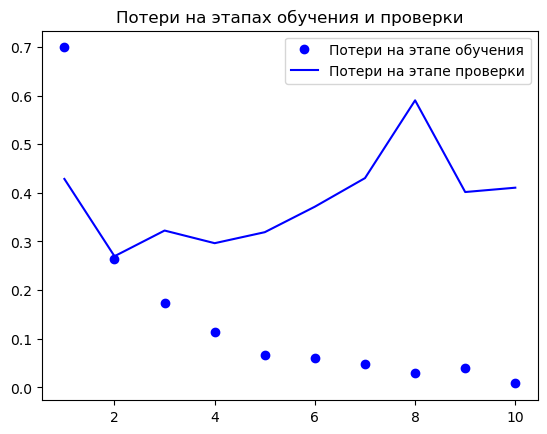

216/216 [==============================] - 34s 155ms/step - loss: 0.1773 - accuracy: 0.9403
Test accuracy: 0.940


In [7]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Точность на этапе обучения")
plt.plot(epochs, val_accuracy, "b", label="Точность на этапе проверки")
plt.title("Точность на этапах обучения и проверки")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Потери на этапе обучения")
plt.plot(epochs, val_loss, "b", label="Потери на этапе проверки")
plt.title("Потери на этапах обучения и проверки")
plt.legend()
plt.show()

test_model = keras.models.load_model('natural_images.h5')
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

In [8]:
inputs = keras.Input(shape=(224, 224, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(16, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.5)(x)
x = layers.Conv2D(32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.5)(x)
x = layers.Conv2D(64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.5)(x)
x = layers.Conv2D(128, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(8, activation='softmax')(x)
model = keras.Model(inputs, outputs)

model.compile(optimizer='adam', loss='categorical_crossentropy', 
             metrics=['accuracy'])

callbacks = [
    keras.callbacks.ModelCheckpoint('natural_images2.h5',
                                  save_best_only=True)
]
history = model.fit(train_dataset,
                   epochs=15,
                   validation_data=validation_dataset,
                   callbacks=callbacks)

Epoch 1/15
173/173 [==============================] - 139s 792ms/step - loss: 1.3260 - accuracy: 0.5245 - val_loss: 1.1645 - val_accuracy: 0.6236
Epoch 2/15
173/173 [==============================] - 137s 790ms/step - loss: 0.5087 - accuracy: 0.8187 - val_loss: 1.0391 - val_accuracy: 0.6070
Epoch 3/15
173/173 [==============================] - 139s 800ms/step - loss: 0.3413 - accuracy: 0.8694 - val_loss: 0.5860 - val_accuracy: 0.7897
Epoch 4/15
173/173 [==============================] - 137s 789ms/step - loss: 0.2663 - accuracy: 0.8996 - val_loss: 0.5303 - val_accuracy: 0.8006
Epoch 5/15
173/173 [==============================] - 134s 774ms/step - loss: 0.2088 - accuracy: 0.9223 - val_loss: 0.5430 - val_accuracy: 0.8006
Epoch 6/15
173/173 [==============================] - 140s 806ms/step - loss: 0.1684 - accuracy: 0.9382 - val_loss: 0.4072 - val_accuracy: 0.8615
Epoch 7/15
173/173 [==============================] - 143s 823ms/step - loss: 0.1497 - accuracy: 0.9417 - val_loss: 0.3122 -

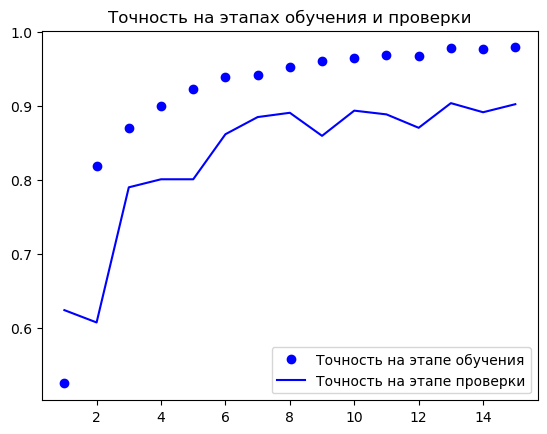

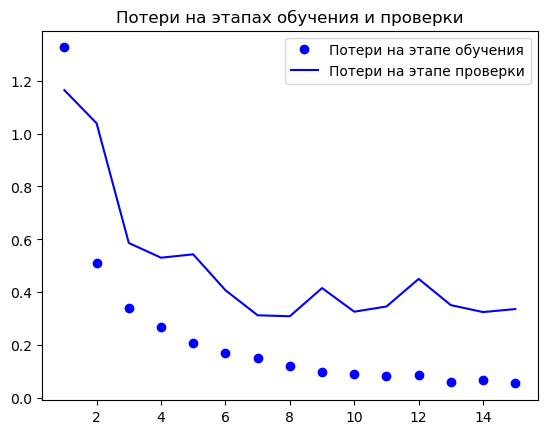

216/216 [==============================] - 39s 177ms/step - loss: 0.1524 - accuracy: 0.9472
Test accuracy: 0.947


In [9]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Точность на этапе обучения")
plt.plot(epochs, val_accuracy, "b", label="Точность на этапе проверки")
plt.title("Точность на этапах обучения и проверки")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Потери на этапе обучения")
plt.plot(epochs, val_loss, "b", label="Потери на этапе проверки")
plt.title("Потери на этапах обучения и проверки")
plt.legend()
plt.show()

test_model = keras.models.load_model('natural_images2.h5')
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

Epoch 1/20
173/173 [==============================] - 137s 779ms/step - loss: 1.4929 - accuracy: 0.4623 - val_loss: 1.4390 - val_accuracy: 0.5344
Epoch 2/20
173/173 [==============================] - 137s 793ms/step - loss: 0.5548 - accuracy: 0.8025 - val_loss: 0.7658 - val_accuracy: 0.7687
Epoch 3/20
173/173 [==============================] - 135s 776ms/step - loss: 0.3515 - accuracy: 0.8681 - val_loss: 0.5805 - val_accuracy: 0.8093
Epoch 4/20
173/173 [==============================] - 133s 769ms/step - loss: 0.2776 - accuracy: 0.8982 - val_loss: 0.4631 - val_accuracy: 0.8441
Epoch 5/20
173/173 [==============================] - 135s 778ms/step - loss: 0.2353 - accuracy: 0.9138 - val_loss: 0.4080 - val_accuracy: 0.8492
Epoch 6/20
173/173 [==============================] - 134s 776ms/step - loss: 0.2078 - accuracy: 0.9187 - val_loss: 0.4288 - val_accuracy: 0.8332
Epoch 7/20
173/173 [==============================] - 137s 788ms/step - loss: 0.1723 - accuracy: 0.9353 - val_loss: 0.4142 -

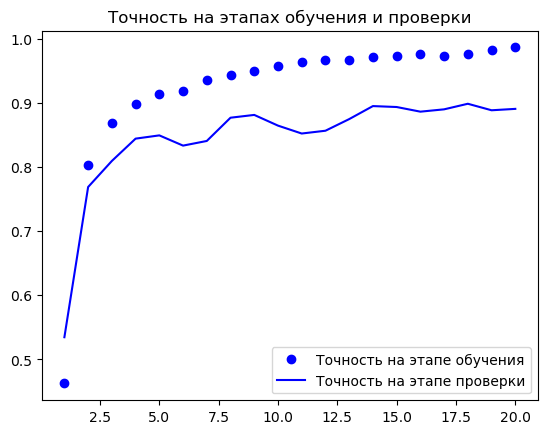

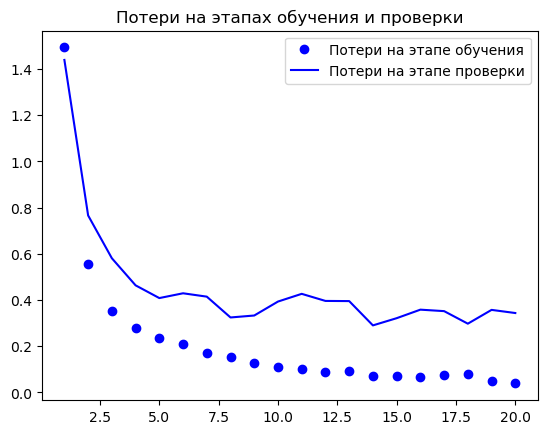

216/216 [==============================] - 35s 162ms/step - loss: 0.1122 - accuracy: 0.9632
Test accuracy: 0.963


In [12]:
inputs = keras.Input(shape=(224, 224, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(16, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.5)(x)
x = layers.Conv2D(32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.5)(x)
x = layers.Conv2D(64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.5)(x)
x = layers.Conv2D(128, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(8, activation='softmax')(x)
model = keras.Model(inputs, outputs)

model.compile(optimizer='adam', loss='categorical_crossentropy', 
             metrics=['accuracy'])

callbacks = [
    keras.callbacks.ModelCheckpoint('natural_images3.h5',
                                  save_best_only=True)
]
history = model.fit(train_dataset,
                   epochs=20,
                   validation_data=validation_dataset,
                   callbacks=callbacks)

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Точность на этапе обучения")
plt.plot(epochs, val_accuracy, "b", label="Точность на этапе проверки")
plt.title("Точность на этапах обучения и проверки")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Потери на этапе обучения")
plt.plot(epochs, val_loss, "b", label="Потери на этапе проверки")
plt.title("Потери на этапах обучения и проверки")
plt.legend()
plt.show()

test_model = keras.models.load_model('natural_images3.h5')
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

In [14]:
dump(model, 'keras-model.joblib')

['keras-model.joblib']